# Spotify data analysis

In [1]:
# visualize audio features for first places
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
from ast import literal_eval
from  itertools import chain
from collections import Counter
pd.options.mode.chained_assignment = None

In [2]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
songs_spotify = pd.read_csv('all_time_billboard_wrap_up_cleaned_spotify.csv', converters = {'Spotify Music Genre': literal_eval})
songs_spotify

,Position,Artist,Song Title,Year,JSON file,Split Names,Song Language,Spotify ID,Spotify Artist,Spotify Song,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,2,Nat King Cole,Mona Lisa,1950,1.json,Nat King Cole,en,5dae01pKNjRQtgOeAkFzPY,Nat King Cole,Mona Lisa,...,0.1130,-12.201,1.0,0.0371,174.578,3.0,https://api.spotify.com/v1/tracks/5dae01pKNjRQ...,audio_features,spotify:track:5dae01pKNjRQtgOeAkFzPY,0.303
1,5,Gary and Bing Crosby,Simple Melody,1950,4.json,Gary,en,33FdwvfiSBRbE2AQ4UehaR,Bing Crosby,Play A Simple Melody - Single Version,...,0.1670,-13.755,1.0,0.0473,138.800,3.0,https://api.spotify.com/v1/tracks/33FdwvfiSBRb...,audio_features,spotify:track:33FdwvfiSBRbE2AQ4UehaR,0.829
2,6,Teresa Brewer,"Music, Music, Music",1950,5.json,Teresa Brewer,en,0lO5EKoz1Rb1pJoPoldE4D,Teresa Brewer,(Put Another Nickel In) Music! Music! Music!,...,0.1540,-14.392,1.0,0.0398,99.136,4.0,https://api.spotify.com/v1/tracks/0lO5EKoz1Rb1...,audio_features,spotify:track:0lO5EKoz1Rb1pJoPoldE4D,0.919
3,7,Guy Lombardo,Third Man Theme,1950,6.json,Guy Lombardo,en,6kVfwQOc2PjVPwbk0aEmN9,Guy Lombardo,Third Man Theme,...,0.0849,-10.808,1.0,0.0358,115.590,4.0,https://api.spotify.com/v1/tracks/6kVfwQOc2PjV...,audio_features,spotify:track:6kVfwQOc2PjVPwbk0aEmN9,0.536
4,8,Red Foley,Chattanoogie Shoe Shine Boy,1950,7.json,Red Foley,en,7Jf323ttHKUnPylFWiaGl3,Red Foley,Chattanoogie Shoe Shine Boy - 1949 Single Version,...,0.1180,-15.925,1.0,0.0494,148.367,4.0,https://api.spotify.com/v1/tracks/7Jf323ttHKUn...,audio_features,spotify:track:7Jf323ttHKUnPylFWiaGl3,0.846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,95,Cole Swindell,Single Saturday Night,2021,6774.json,Cole Swindell,en,1irAliF0T8sLIOPJp6n7rU,Cole Swindell,Single Saturday Night,...,0.2260,-5.070,1.0,0.0473,81.949,4.0,https://api.spotify.com/v1/tracks/1irAliF0T8sL...,audio_features,spotify:track:1irAliF0T8sLIOPJp6n7rU,0.694
4807,96,Lainey Wilson,Things A Man Oughta Know,2021,6775.json,Lainey Wilson,en,5QS8PNEWbqTEZyQ6e9ZbJf,Lainey Wilson,Things A Man Oughta Know,...,0.1330,-5.623,1.0,0.0312,139.931,4.0,https://api.spotify.com/v1/tracks/5QS8PNEWbqTE...,audio_features,spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf,0.397
4808,97,BRS Kash,Throat Baby (Go Baby),2021,6776.json,BRS Kash,en,15C4TnrrVdym7UykxQIOTZ,BRS Kash,Throat Baby (Go Baby) (with DaBaby & City Girl...,...,0.1670,-8.420,0.0,0.3240,131.988,4.0,https://api.spotify.com/v1/tracks/15C4TnrrVdym...,audio_features,spotify:track:15C4TnrrVdym7UykxQIOTZ,0.397
4809,98,Rod Wave,Tombstone,2021,6777.json,Rod Wave,en,3zc8VZEpM1onYV4FWGdFvm,Rod Wave,Tombstone,...,0.1290,-5.212,1.0,0.1630,84.448,4.0,https://api.spotify.com/v1/tracks/3zc8VZEpM1on...,audio_features,spotify:track:3zc8VZEpM1onYV4FWGdFvm,0.535


In [3]:
# Drop duplicated records with the same JSON file name
songs_spotify = songs_spotify.drop_duplicates(subset = 'JSON file', keep = 'first')

Text(0.5, 1.0, "Count received songs' lyrics per year")

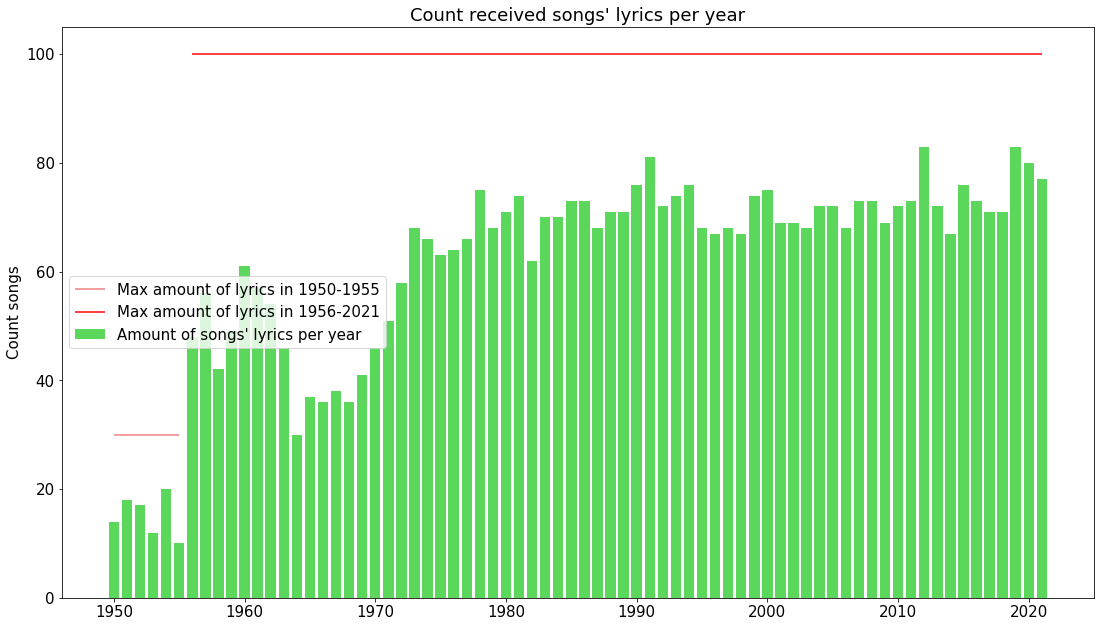

In [4]:
# Count received songs' lyrics per year
grouped_by_year = songs_spotify.groupby('Year').size()
plt.figure(figsize = (18.5, 10.5))
plt.bar(grouped_by_year.index, grouped_by_year, color = 'limegreen', alpha = 0.8)
plt.hlines(y = 30, xmin = 1950, xmax = 1955, colors = 'lightcoral')
plt.hlines(y = 100, xmin = 1956, xmax = 2021, colors='r')
plt.ylabel('Count songs')
plt.legend(['Max amount of lyrics in 1950-1955', 'Max amount of lyrics in 1956-2021', 'Amount of songs\' lyrics per year'], loc = 6)
plt.title('Count received songs\' lyrics per year')

In [5]:
# Choose only one genre from lists of genres
genres = pd.Series(list(chain.from_iterable(songs_spotify['Spotify Music Genre'])))
genres_count_df = pd.DataFrame(genres.value_counts()).reset_index()
genres_count_df = genres_count_df.rename(columns = {'index': 'Genre', 0: 'Count genre'})
genres_count_df.head(10)

,Genre,Count genre
0,dance pop,939
1,pop,908
2,soft rock,827
3,mellow gold,797
4,adult standards,710
5,urban contemporary,601
6,rock,547
7,classic rock,463
8,r&b,455
9,brill building pop,447


Text(0.5, 1.0, 'The most popular music genres')

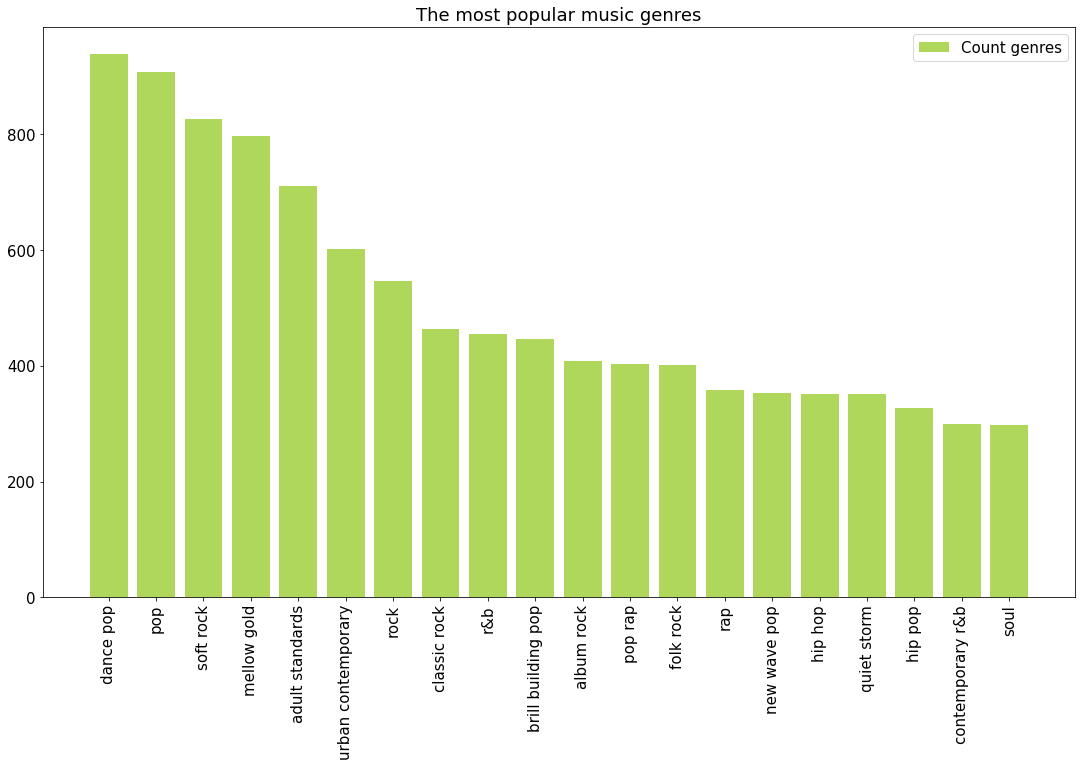

In [6]:
# Plot 20 first music genres
plt.figure(figsize = (18.5, 10.5))
plt.bar(genres_count_df['Genre'].head(20), genres_count_df['Count genre'].head(20), color = 'yellowgreen', alpha = 0.8)
plt.xticks(rotation=90)
plt.legend(['Count genres'], loc = 1)
plt.title('The most popular music genres')

In [7]:
# Grouped mean values for audio features
columns_audio_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence']
grouped_audio_features = songs_spotify.groupby('Year')[columns_audio_features].mean()
grouped_audio_features.style.background_gradient(cmap = 'Greens')

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
Year,,,,,,,,,,,
1950,0.858643,0.546929,179074.214286,0.258457,0.059191,0.193064,-13.293429,0.040157,121.068929,3.714286,0.552071
1951,0.884667,0.382000,180094.277778,0.285617,0.004532,0.199544,-11.864778,0.041739,120.598667,4.000000,0.419889
1952,0.883000,0.481412,168662.764706,0.214694,0.000150,0.233300,-12.805118,0.043324,111.159235,3.588235,0.423412
1953,0.874250,0.422500,173023.250000,0.216717,0.072255,0.142708,-11.840917,0.105617,93.281917,4.000000,0.364000
1954,0.825700,0.423400,179586.000000,0.256025,0.000072,0.212535,-12.409800,0.044125,91.178450,3.700000,0.434950
1955,0.769200,0.503600,164206.200000,0.373050,0.064498,0.142900,-13.308300,0.088890,121.432800,3.800000,0.542200
1956,0.769833,0.488417,154287.354167,0.376027,0.006744,0.203488,-11.956750,0.061615,117.100208,3.708333,0.606854
1957,0.744743,0.550161,149984.767857,0.447463,0.000519,0.190688,-10.635054,0.058377,119.013768,3.839286,0.664143
1958,0.672119,0.549524,146547.928571,0.468283,0.038670,0.172917,-10.994976,0.052533,120.156405,3.809524,0.678310


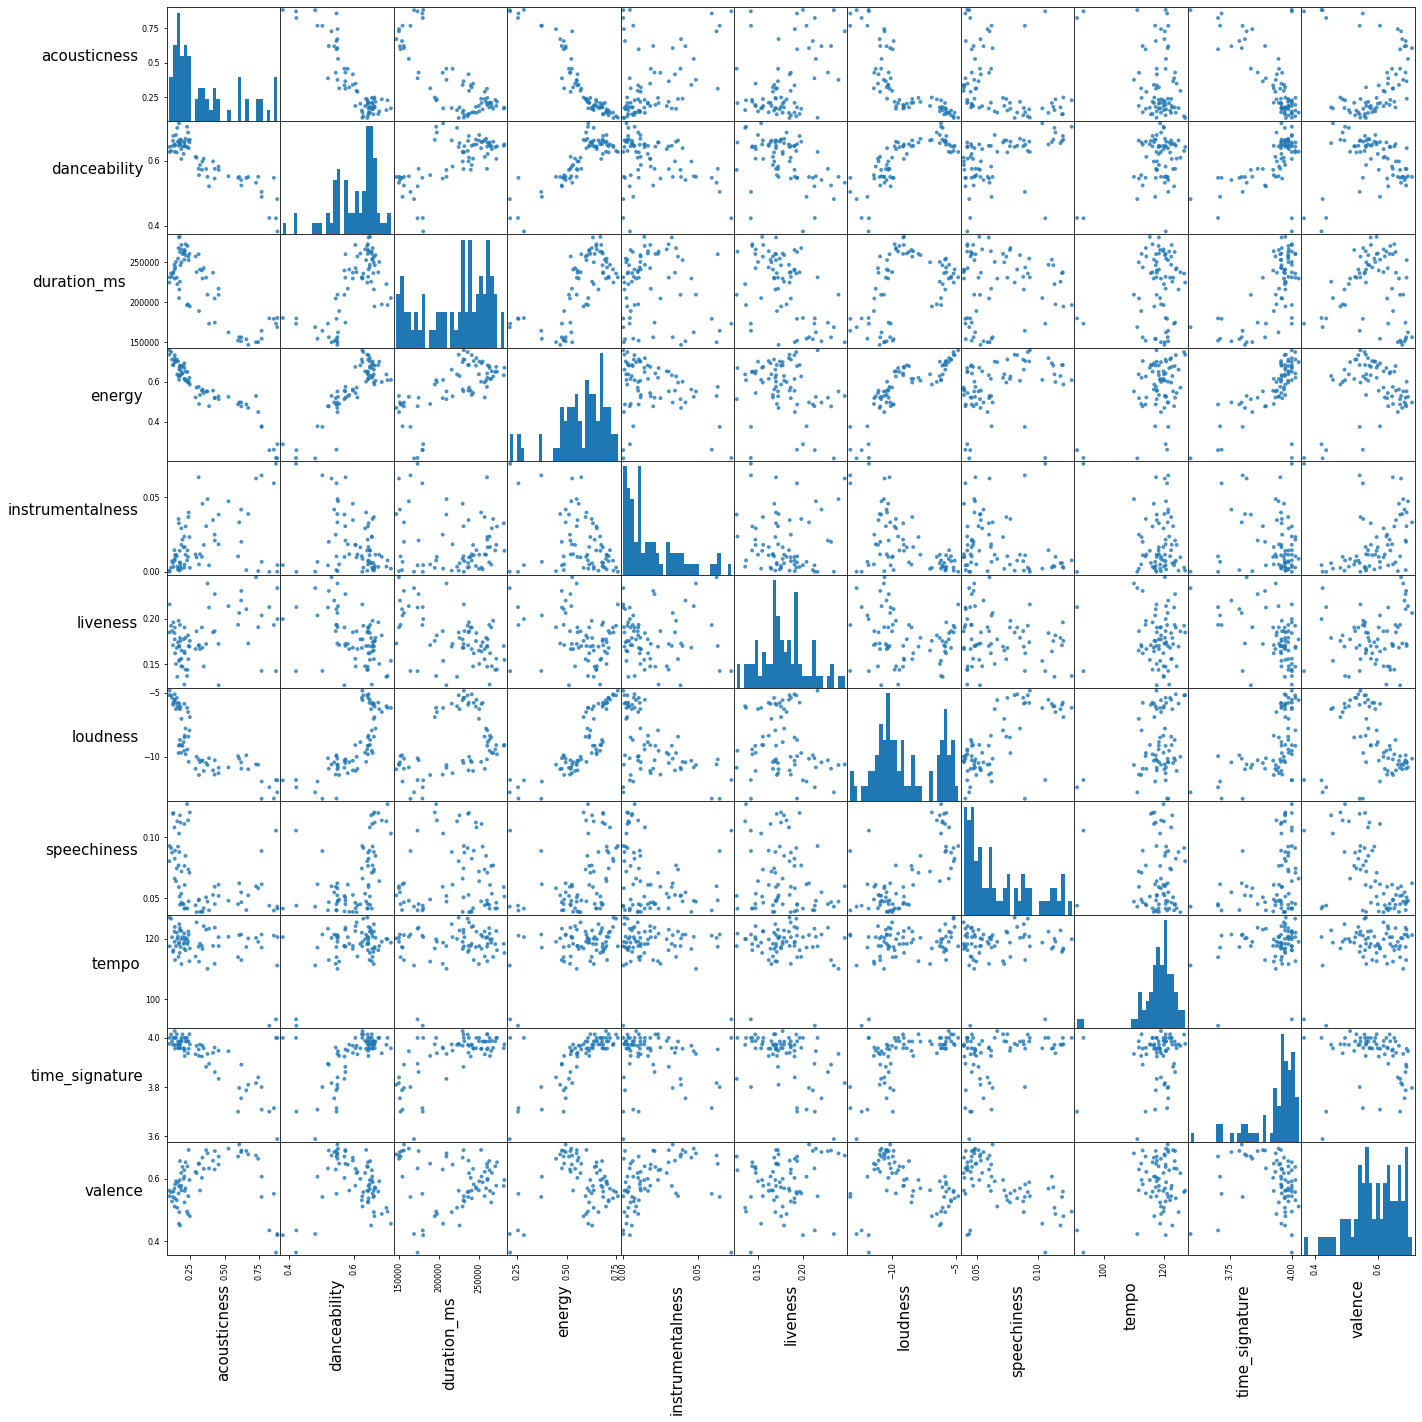

In [8]:
# Pair plot
axes = pd.plotting.scatter_matrix(grouped_audio_features, figsize = (20, 20), hist_kwds = {'bins': 30}, s = 60, alpha = 0.8)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace = 0, hspace = 0)
plt.show()

<AxesSubplot:>

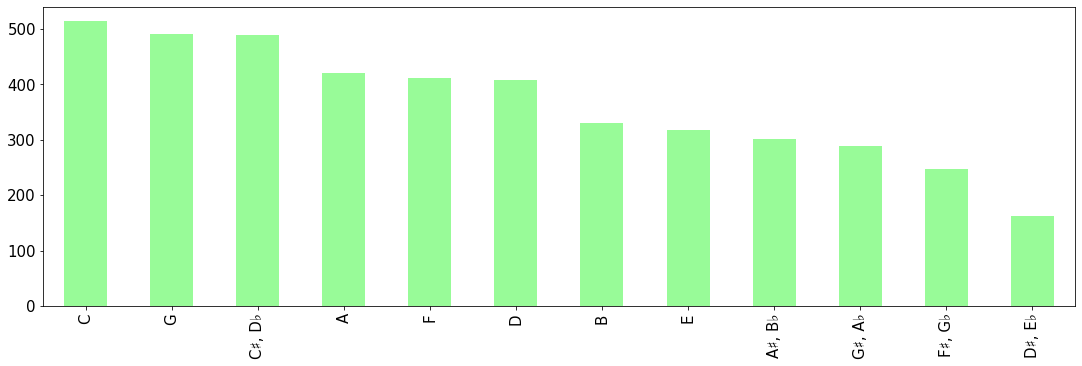

In [9]:
# Histograms for categorical data
keys = {0.0: 'C', 1.0: 'C♯, D♭', 2.0: 'D', 3.0: 'D♯, E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯, G♭', 7.0: 'G', 8.0: 'G♯, A♭', 9.0: 'A', 10.0: 'A♯, B♭', 11.0: 'B'}
songs_spotify['key'] = songs_spotify['key'].map(keys)
songs_spotify['key'].value_counts().plot.bar(figsize = (18.5, 5.5), color = 'palegreen')

<AxesSubplot:>

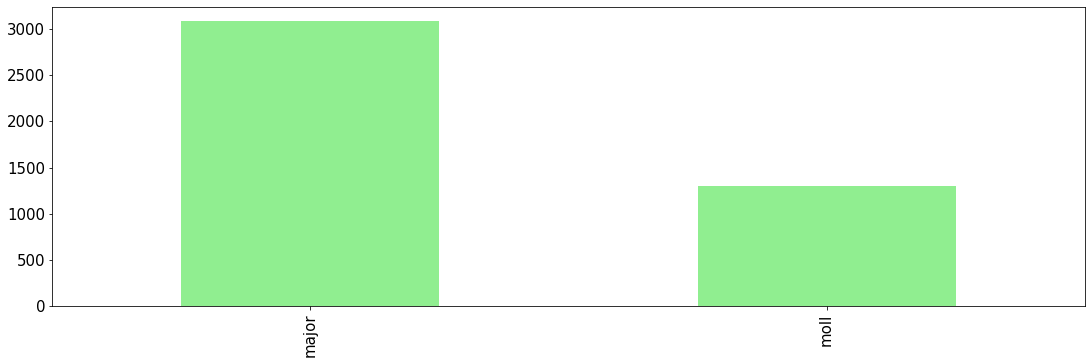

In [10]:
modes = {0.0: 'moll',1.0: 'major'}
songs_spotify['mode'] = songs_spotify['mode'].map(modes)
songs_spotify['mode'].value_counts().plot.bar(figsize = (18.5, 5.5), rot = 90, color = 'lightgreen')